**Task 1**| solve the PDE | u_xx(x) + k * u(x) * c(x), x ε [0,1] and c(x) = sin(-x**2)

In [12]:
import torch
import torch.nn as nn
import torch.autograd
import numpy as np
import matplotlib.pyplot as plt

class Net1D(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Net1D, self).__init__()
        self.hidden = nn.Linear(input_size, hidden_size)
        self.output = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = torch.tanh(self.hidden(x))
        x = self.output(x)
        return x

In [15]:
def compute_loss(net, x):
    x.requires_grad = True
    u = net(x)
    u_x = torch.autograd.grad(u.sum(), x, create_graph=True)[0]
    u_xx = torch.autograd.grad(u_x.sum(), x, create_graph=True)[0]

    # PDE Loss
    pde_loss = (u_xx + u * torch.sin(-x ** 2)).pow(2).mean()

    # Boundary condition Losses
    x_left = torch.tensor([0.0], requires_grad=True)
    x_right = torch.tensor([1.0])

    u_left = net(x_left)
    # u_left.requires_grad = True # Removed this line
    u_x_left = torch.autograd.grad(u_left.sum(), x_left, create_graph=True)[0]

    u_right = net(x_right)

    bc_loss = u_x_left.pow(2) + (u_right - 1).pow(2)

    # Total Loss
    loss = pde_loss + bc_loss

    return loss

############ step:0 ##############
Steps: 0, No training performed.
############ step:1000 ##############
Steps: 1000, Loss: 9.348249295726418e-05
############ step:2000 ##############
Steps: 2000, Loss: 2.3389988200506195e-05
############ step:8000 ##############
Steps: 8000, Loss: 3.7322893149394076e-06


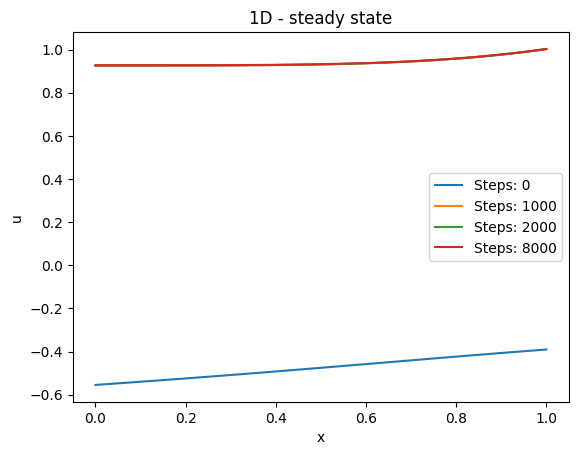

In [16]:
net = Net1D(1, 40, 1)
optimizer = torch.optim.Adam(net.parameters(), lr=0.01)

training_steps = [ 0, 1000, 2000, 8000]
solutions = []

for steps in training_steps:
    print(f"############ step:{steps} ##############")
    current_loss = None # Initialize loss for the current training step
    for epoch in range(steps):
        optimizer.zero_grad()
        x_rand = torch.rand(64, 1)
        current_loss = compute_loss(net=net, x=x_rand) # Assign loss to current_loss
        current_loss.backward()
        optimizer.step()
    # Print the loss after the inner loop completes for the current step
    if current_loss is not None:
        print(f"Steps: {steps}, Loss: {current_loss.item()}")
    else:
        print(f"Steps: {steps}, No training performed.") # Handle the case where steps is 0

    # store predictions of each step
    x = torch.linspace(0, 1, 100).reshape(-1, 1) # Reshape x to be (100, 1)
    solutions.append(net(x).detach().numpy())

for i, steps in enumerate(training_steps):
    plt.plot(x.numpy(), solutions[i], label=f'Steps: {steps}')
plt.legend()
plt.title("1D - steady state")
plt.xlabel("x")
plt.ylabel("u")
plt.show()